In [1]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

In [2]:

spark = SparkSession.builder.appName("YelpDataAnalysis").getOrCreate()

24/11/24 21:41:00 WARN Utils: Your hostname, yelp resolves to a loopback address: 127.0.1.1; using 10.210.173.189 instead (on interface ens18)
24/11/24 21:41:00 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/11/24 21:41:01 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
business_df = spark.read.json("file:///home/dps/Documents/yelp_dataset/yelp_academic_dataset_business.json")
business_df.show(5)

24/11/24 21:41:17 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+----------+------------+--------------------+-----------+------------+-----+-----+
|             address|          attributes|         business_id|          categories|         city|               hours|is_open|  latitude|   longitude|                name|postal_code|review_count|stars|state|
+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+----------+------------+--------------------+-----------+------------+-----+-----+
|1616 Chapala St, ...|{null, null, null...|Pns2l4eNsfO8kk83d...|Doctors, Traditio...|Santa Barbara|                null|      0|34.4266787|-119.7111968|Abby Rappoport, L...|      93101|           7|  5.0|   CA|
|87 Grasso Plaza S...|{null, null, null...|mpf3x-BjTdTEA3yCZ...|Shipping Centers,...|       Affton|{8:0-18:30, 0:0-0...|      1| 38.551126|  -90.335695|    

In [4]:
arizona_business_df = business_df.filter(business_df['state'] == 'AZ')
arizona_business_df.show(5)

+--------------------+--------------------+--------------------+--------------------+------+--------------------+-------+----------+------------+--------------------+-----------+------------+-----+-----+
|             address|          attributes|         business_id|          categories|  city|               hours|is_open|  latitude|   longitude|                name|postal_code|review_count|stars|state|
+--------------------+--------------------+--------------------+--------------------+------+--------------------+-------+----------+------------+--------------------+-----------+------------+-----+-----+
|5255 E Broadway Blvd|{null, null, null...|tUFrWirKiKi_TAnsV...|Department Stores...|Tucson|{8:0-23:0, 8:0-22...|      0| 32.223236| -110.880452|              Target|      85711|          22|  3.5|   AZ|
|     625 N Stone Ave|{null, null, null...|rBmpy_Y1UbBx8ggHl...|Automotive, Auto ...|Tucson|{8:0-17:0, 0:0-0:...|      1|32.2298719|-110.9723419|Arizona Truck Out...|      85705|      

In [5]:
checkin_df = spark.read.json("file:///home/dps/Documents/yelp_dataset/yelp_academic_dataset_checkin.json")
checkin_df.show(5)

+--------------------+--------------------+
|         business_id|                date|
+--------------------+--------------------+
|---kPU91CF4Lq2-Wl...|2020-03-13 21:10:...|
|--0iUa4sNDFiZFrAd...|2010-09-13 21:43:...|
|--30_8IhuyMHbSOcN...|2013-06-14 23:29:...|
|--7PUidqRWpRSpXeb...|2011-02-15 17:12:...|
|--7jw19RH9JKXgFoh...|2014-04-21 20:42:...|
+--------------------+--------------------+
only showing top 5 rows



In [6]:
review_df = spark.read.json("file:///home/dps/Documents/yelp_dataset/yelp_academic_dataset_review.json")
review_df.show(5)

+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|XQfwVwDr-v0ZS3_Cb...|   0|2018-07-07 22:09:11|    0|KU_O5udG6zpxOg-Vc...|  3.0|If you decide to ...|     0|mh_-eMZ6K5RLWhZyI...|
|7ATYjTIgM3jUlt4UM...|   1|2012-01-03 15:28:18|    0|BiTunyQ73aT9WBnpR...|  5.0|I've taken a lot ...|     1|OyoGAe7OKpv6SyGZT...|
|YjUWPpI6HXG530lwP...|   0|2014-02-05 20:30:30|    0|saUsX_uimxRlCVr67...|  3.0|Family diner. Had...|     0|8g_iMtfSiwikVnbP2...|
|kxX2SOes4o-D3ZQBk...|   1|2015-01-04 00:01:03|    0|AqPFMleE6RsU23_au...|  5.0|Wow!  Yummy, diff...|     1|_7bHUi9Uuf5__HHc_...|
|e4Vwtrqf-wpJfwesg...|   1|2017-01-14 20:54:15|    0|Sx8TMOWLNuJBWer-0...|  4.0|Cute inter

In [7]:
tip_df = spark.read.json("file:///home/dps/Documents/yelp_dataset/yelp_academic_dataset_tip.json")
tip_df.show(5)

+--------------------+----------------+-------------------+--------------------+--------------------+
|         business_id|compliment_count|               date|                text|             user_id|
+--------------------+----------------+-------------------+--------------------+--------------------+
|3uLgwr0qeCNMjKenH...|               0|2012-05-18 02:17:21|Avengers time wit...|AGNUgVwnZUey3gcPC...|
|QoezRbYQncpRqyrLH...|               0|2013-02-05 18:35:10|They have lots of...|NBN4MgHP9D3cw--Sn...|
|MYoRNLb5chwjQe3c_...|               0|2013-08-18 00:56:08|It's open even wh...|-copOvldyKh1qr-vz...|
|hV-bABTK-glh5wj31...|               0|2017-06-27 23:05:38|Very decent fried...|FjMQVZjSqY8syIO-5...|
|_uN0OudeJ3Zl_tf6n...|               0|2012-10-06 19:43:09|Appetizers.. plat...|ld0AperBXk1h6Ubqm...|
+--------------------+----------------+-------------------+--------------------+--------------------+
only showing top 5 rows



In [8]:
user_df = spark.read.json("file:///home/dps/Documents/yelp_dataset/yelp_academic_dataset_user.json")
user_df.show(5)

+-------------+---------------+---------------+----------------+--------------+---------------+---------------+---------------+-----------------+----------------+------------------+-----------------+-----+--------------------+----+--------------------+-----+------+------------+------+--------------------+-------------------+
|average_stars|compliment_cool|compliment_cute|compliment_funny|compliment_hot|compliment_list|compliment_more|compliment_note|compliment_photos|compliment_plain|compliment_profile|compliment_writer| cool|               elite|fans|             friends|funny|  name|review_count|useful|             user_id|      yelping_since|
+-------------+---------------+---------------+----------------+--------------+---------------+---------------+---------------+-----------------+----------------+------------------+-----------------+-----+--------------------+----+--------------------+-----+------+------------+------+--------------------+-------------------+
|         3.91|    

In [9]:
arizona_business_df.createOrReplaceTempView("business")
checkin_df.createOrReplaceTempView("checkin")
tip_df.createOrReplaceTempView("tip")
review_df.createOrReplaceTempView("review")
user_df.createOrReplaceTempView("user")

### Query 1: Top active users by Review Count

In [10]:
query1 = spark.sql("""
SELECT u.user_id, u.name, u.review_count, u.average_stars
FROM user u
ORDER BY u.review_count DESC
LIMIT 10;
""")

query1.show()

+--------------------+--------+------------+-------------+
|             user_id|    name|review_count|average_stars|
+--------------------+--------+------------+-------------+
|Hi10sGSZNxQH3NLyW...|     Fox|       17473|         3.77|
|8k3aO-mPeyhbR5HUu...|  Victor|       16978|         3.35|
|hWDybu_KvYLSdEFzG...|   Bruce|       16567|         3.67|
|RtGqdDBvvBCjcu5dU...|   Shila|       12868|         3.87|
|P5bUL3Engv-2z6kKo...|     Kim|        9941|         3.81|
|nmdkHL2JKFx55T3nq...|  Nijole|        8363|         3.75|
|bQCHF5rn5lMI9c5kE...| Vincent|        8354|         3.87|
|8RcEwGrFIgkt9WQ35...|  George|        7738|         3.49|
|Xwnf20FKuikiHcSpc...| Kenneth|        6766|         3.32|
|CxDOIDnH8gp9KXzpB...|Jennifer|        6679|         3.34|
+--------------------+--------+------------+-------------+



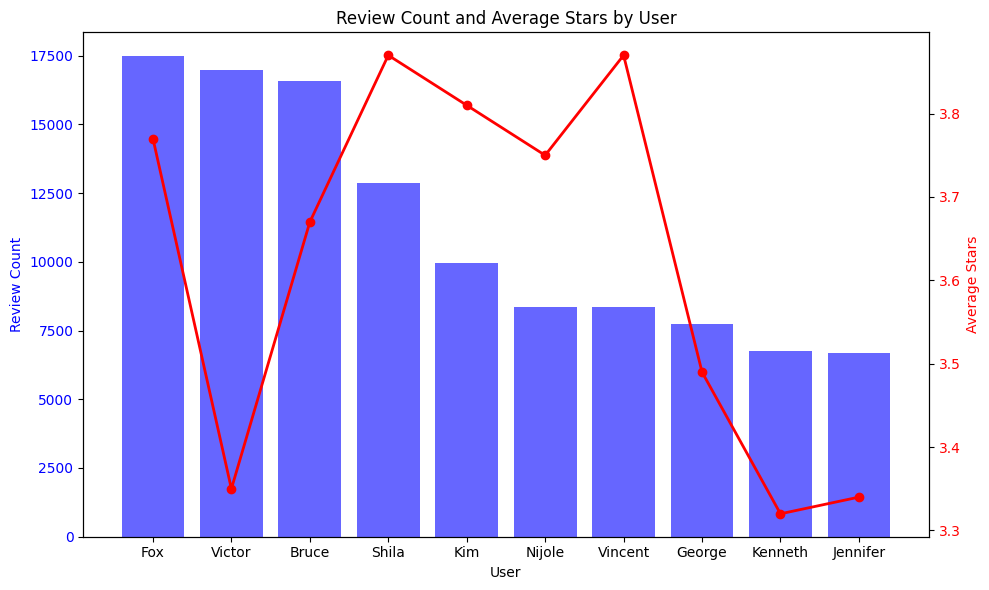

In [11]:
import matplotlib.pyplot as plt


query1_df = query1.toPandas()

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(query1_df['name'], query1_df['review_count'], color='b', alpha=0.6, label='Review Count')
ax1.set_xlabel('User')
ax1.set_ylabel('Review Count', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()  
ax2.plot(query1_df['name'], query1_df['average_stars'], color='r', marker='o', label='Average Stars', linestyle='-', linewidth=2)
ax2.set_ylabel('Average Stars', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.xticks(rotation=45)

plt.title('Review Count and Average Stars by User')
plt.tight_layout()
plt.show()


### Query 2:  Top 10 users with the most compliments and their average rating (Complex Query)

In [12]:
query2 = spark.sql("""
SELECT 
    u.user_id,
    u.name,
    SUM(t.compliment_count) AS total_compliments,
    u.average_stars AS avg_user_rating
FROM 
    user u
LEFT JOIN 
    tip t 
ON 
    u.user_id = t.user_id
GROUP BY 
    u.user_id, u.name, u.average_stars
ORDER BY 
    total_compliments DESC
LIMIT 10;

""")

query2.show()

24/11/24 21:42:37 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:42:37 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:42:37 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:42:37 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:42:38 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:42:38 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:42:38 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:42:38 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:42:38 WARN RowBasedKeyValueBatch: Calling spill() on

+--------------------+-------+-----------------+---------------+
|             user_id|   name|total_compliments|avg_user_rating|
+--------------------+-------+-----------------+---------------+
|fCvMnJU1Z-XhAjKg9...|Michael|              190|           3.29|
|sraTrYU-7q_bQ0TxQ...|  Brian|               82|           4.15|
|A4bsa7ykYRVCnb4h2...| Angela|               75|           4.11|
|tsMF0FcFcHZ8i28Wz...|  Susan|               66|           3.91|
|DwaaafwryFbW7C4E1...|  Donna|               62|           3.99|
|lMY8NBPyzlPbbu-KB...|Christy|               60|           4.19|
|-G7Zkl1wIWBBmD0KR...| Gerald|               59|           3.68|
|YsDbMDO7GAfcqZOwi...|  Sofia|               54|           3.95|
|__QLyY_W06q10ZfBQ...|   Anna|               49|            4.2|
|AaJ9d4OrFmgc4S_U2...|  Steve|               48|           4.23|
+--------------------+-------+-----------------+---------------+



24/11/24 21:42:48 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:42:48 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:42:48 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:42:48 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:42:48 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:42:48 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:42:48 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:42:48 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:42:48 WARN RowBasedKeyValueBatch: Calling spill() on

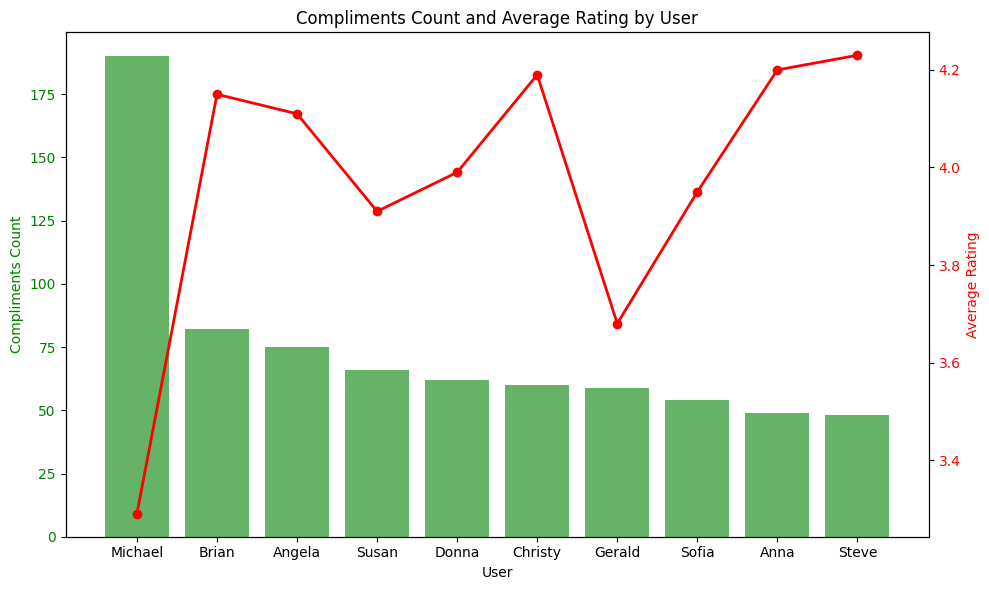

In [13]:
query2_df = query2.toPandas()

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(query2_df['name'], query2_df['total_compliments'], color='g', alpha=0.6, label='Compliments Count')
ax1.set_xlabel('User')
ax1.set_ylabel('Compliments Count', color='g')
ax1.tick_params(axis='y', labelcolor='g')

ax2 = ax1.twinx() 
ax2.plot(query2_df['name'], query2_df['avg_user_rating'], color='r', marker='o', label='Average Rating', linestyle='-', linewidth=2)
ax2.set_ylabel('Average Rating', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.xticks(rotation=45)

plt.title('Compliments Count and Average Rating by User')
plt.tight_layout()
plt.show()


### Query 3: User's Total Reviews vs Number of Businesses They Have Reviewed (Complex Query)

In [14]:
query3 = spark.sql("""
SELECT 
    u.user_id,
    u.name,
    COUNT(DISTINCT r.business_id) AS businesses_reviewed,
    COUNT(r.review_id) AS total_reviews
FROM 
    user u
JOIN 
    review r ON u.user_id = r.user_id
GROUP BY 
    u.user_id, u.name
ORDER BY 
    total_reviews DESC
LIMIT 100;
""")

query3.show()

24/11/24 21:43:10 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:43:10 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:43:10 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:43:10 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:43:10 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:43:10 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:43:10 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:43:10 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:43:10 WARN RowBasedKeyValueBatch: Calling spill() on

+--------------------+-----------+-------------------+-------------+
|             user_id|       name|businesses_reviewed|total_reviews|
+--------------------+-----------+-------------------+-------------+
|_BcWyKQL16ndpBdgg...|      Karen|               2199|         3048|
|Xw7ZjaGfr0WNVt6s_...|   Marielle|               1754|         1840|
|0Igx-a1wAstiBDerG...|        Jen|               1471|         1747|
|-G7Zkl1wIWBBmD0KR...|     Gerald|               1549|         1682|
|ET8n-r7glWYqZhuR6...|   Michelle|               1342|         1653|
|bYENop4BuQepBjM1-...|     Steven|               1108|         1578|
|1HM81n6n4iPIFU5d2...|    Shannon|               1451|         1554|
|fr1Hz2acAb3OaL3l6...|       Boon|               1394|         1447|
|wXdbkFZsfDR7utJvb...|        Ken|               1343|         1396|
|Um5bfs5DH6eizgjH3...|     Dianna|               1374|         1391|
|qjfMBIZpQT9DDtw_B...|     Rachel|               1194|         1324|
|VL12EhEdT4OWqGq0n...|       Mark|

24/11/24 21:43:49 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:43:49 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:43:49 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:43:49 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:43:49 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:43:49 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:43:49 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:43:49 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:43:49 WARN RowBasedKeyValueBatch: Calling spill() on

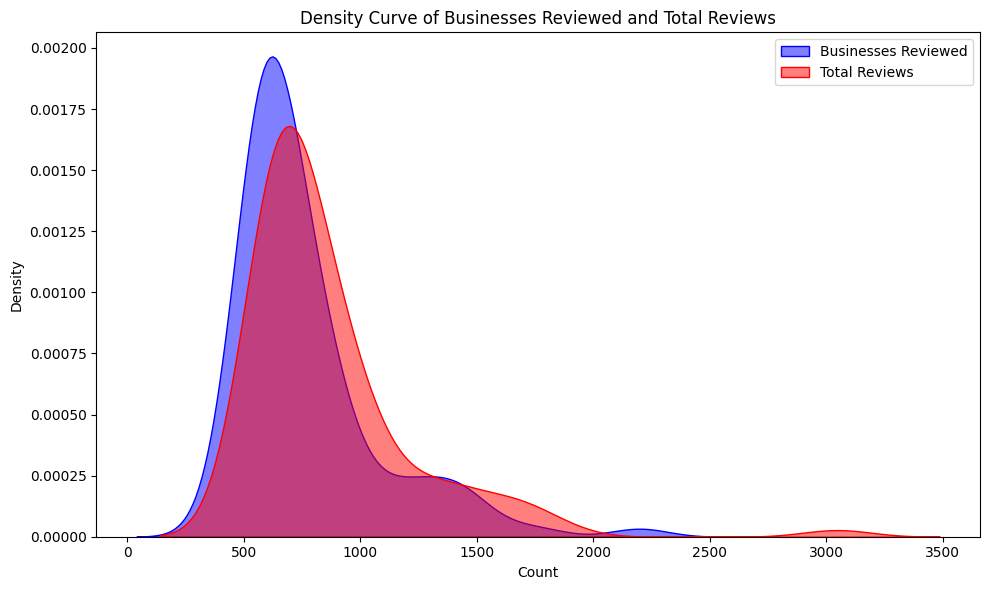

In [15]:
import seaborn as sns

query3_df = query3.toPandas()
plt.figure(figsize=(10, 6))

sns.kdeplot(query3_df['businesses_reviewed'], label='Businesses Reviewed', color='blue', fill=True, alpha=0.5)

sns.kdeplot(query3_df['total_reviews'], label='Total Reviews', color='red', fill=True, alpha=0.5)

plt.xlabel('Count')
plt.ylabel('Density')
plt.title('Density Curve of Businesses Reviewed and Total Reviews')

plt.legend()

plt.tight_layout()
plt.show()


### Query 4: User's Average Rating for Each Business (Complex Query)

In [16]:
query4 = spark.sql("""
SELECT 
    u.user_id, 
    u.name AS user_name, 
    b.business_id, 
    b.name AS business_name, 
    AVG(r.stars) AS average_rating,
    COUNT(r.review_id) AS total_reviews
FROM 
    user u
JOIN 
    review r ON u.user_id = r.user_id
JOIN 
    business b ON r.business_id = b.business_id
GROUP BY 
    u.user_id, u.name, b.business_id, b.name
ORDER BY 
    u.user_id, average_rating DESC;

""")

query4.show()

24/11/24 21:44:26 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:44:26 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:44:26 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:44:26 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:44:26 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:44:26 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:44:26 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:44:26 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:44:27 WARN RowBasedKeyValueBatch: Calling spill() on

+--------------------+---------+--------------------+--------------------+--------------+-------------+
|             user_id|user_name|         business_id|       business_name|average_rating|total_reviews|
+--------------------+---------+--------------------+--------------------+--------------+-------------+
|--4ZhTMV2fIlGhcUk...|  Belinda|7znuVDPDpjh4nkJ_x...|Taste of Tucson D...|           4.0|            1|
|--4ZhTMV2fIlGhcUk...|  Belinda|JHxfEDW05_KSTfk-S...|        Indian Twist|           3.0|            1|
|--5t79VnMbzUeoaOm...|  Alfonso|o6hWaMjS7-CdXq3Wz...|       Best Mattress|           5.0|            1|
|--5t79VnMbzUeoaOm...|  Alfonso|n04MPaNrNSUJI_ogO...|           Starbucks|           5.0|            1|
|--5t79VnMbzUeoaOm...|  Alfonso|jZ1rUspubgkuZjwKJ...|           MOD Pizza|           5.0|            1|
|--5t79VnMbzUeoaOm...|  Alfonso|tZR09XLQ2tjOgXhSo...|             Pei Wei|           2.0|            1|
|--5t79VnMbzUeoaOm...|  Alfonso|9tWLiz52KN-S7CFZv...|        Bey

### Query 5: Users with the Most Detailed Reviews (Complex Query)

In [17]:
query5 = spark.sql("""
SELECT 
    u.user_id, 
    u.name AS user_name, 
    COUNT(r.review_id) AS total_reviews, 
    SUM(LENGTH(r.text)) AS total_review_text_length
FROM 
    user u
JOIN 
    review r ON u.user_id = r.user_id
GROUP BY 
    u.user_id, user_name
ORDER BY 
    total_review_text_length DESC
LIMIT 20;
""")

query5.show()

24/11/24 21:45:01 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:45:01 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:45:01 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:45:01 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:45:01 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:45:01 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:45:01 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:45:01 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:45:01 WARN RowBasedKeyValueBatch: Calling spill() on

+--------------------+------------+-------------+------------------------+
|             user_id|   user_name|total_reviews|total_review_text_length|
+--------------------+------------+-------------+------------------------+
|A9cXP_K95FRor1qxu...|     Richard|          758|                 2784856|
|wXdbkFZsfDR7utJvb...|         Ken|         1396|                 2533353|
|-G7Zkl1wIWBBmD0KR...|      Gerald|         1682|                 2487700|
|bYENop4BuQepBjM1-...|      Steven|         1578|                 2181755|
|AaJ9d4OrFmgc4S_U2...|       Steve|          964|                 1974055|
|Xw7ZjaGfr0WNVt6s_...|    Marielle|         1840|                 1801614|
|cufhYFdyrUAt4SWe-...|        John|          742|                 1758012|
|-kLVfaJytOJY2-QdQ...|   Christina|         1076|                 1743709|
|ET8n-r7glWYqZhuR6...|    Michelle|         1653|                 1736684|
|pou3BbKsIozfH50rx...|       Brett|         1247|                 1703230|
|vHc-UrI9yfL_pnnc6...|   

24/11/24 21:45:45 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:45:45 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:45:45 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:45:45 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:45:45 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:45:45 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:45:45 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:45:45 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/11/24 21:45:45 WARN RowBasedKeyValueBatch: Calling spill() on

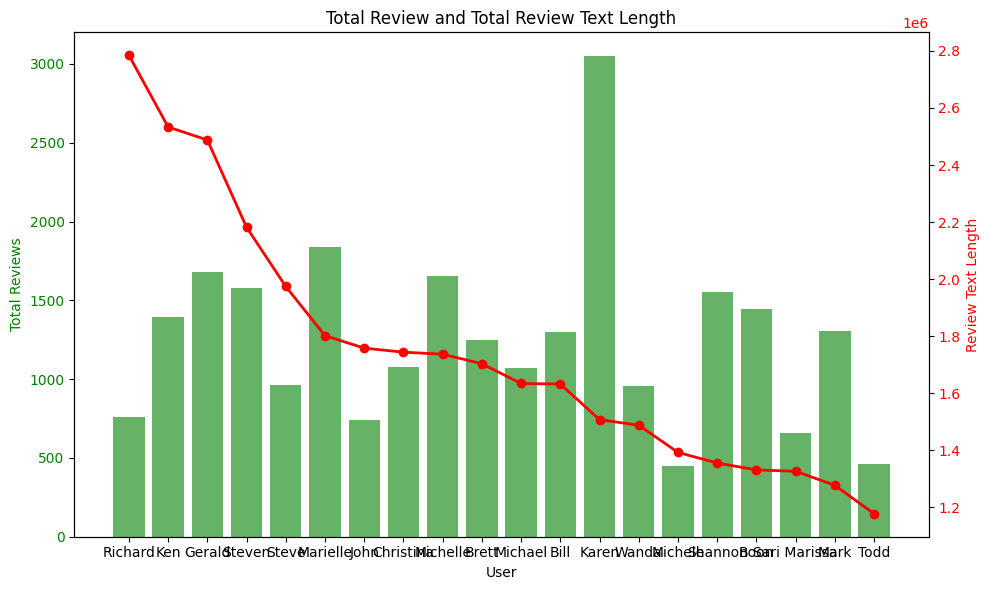

In [18]:
query5_df = query5.toPandas()

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(query5_df['user_name'], query5_df['total_reviews'], color='g', alpha=0.6, label='Total Reviews')
ax1.set_xlabel('User')
ax1.set_ylabel('Total Reviews', color='g')
ax1.tick_params(axis='y', labelcolor='g')

ax2 = ax1.twinx() 
ax2.plot(query5_df['user_name'], query5_df['total_review_text_length'], color='r', marker='o', label='Review Text Length', linestyle='-', linewidth=2)
ax2.set_ylabel('Review Text Length', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.xticks(rotation=90)

plt.title('Total Review and Total Review Text Length')
plt.tight_layout()
plt.show()


### Query 6: Users with the Longest Tip Texts (Complex Query)

In [19]:
query6 = spark.sql("""
SELECT 
    u.user_id, 
    u.name AS user_name, 
    COUNT(t.user_id) AS total_tips, 
    SUM(LENGTH(t.text)) AS total_tip_text_length
FROM 
    user u
JOIN 
    tip t ON u.user_id = t.user_id
GROUP BY 
    u.user_id, user_name
ORDER BY 
    total_tip_text_length DESC
LIMIT 20;
""")

query6.show()

+--------------------+------------+----------+---------------------+
|             user_id|   user_name|total_tips|total_tip_text_length|
+--------------------+------------+----------+---------------------+
|fCvMnJU1Z-XhAjKg9...|     Michael|      4071|               450813|
|sraTrYU-7q_bQ0TxQ...|       Brian|       902|               119223|
|qjfMBIZpQT9DDtw_B...|      Rachel|      1230|                78155|
|oHjUPJHEOGJsrPqu3...|    Michelle|       465|                73365|
|kKPbWlBjpSL3Qzvtn...|  Sam 'Wags'|       655|                70715|
|5Y5KbsI5buMcNh2hT...|      Marcia|      1385|                68799|
|3QnoTcrxuafMCoTzW...|Sari Marissa|       493|                68503|
|-G7Zkl1wIWBBmD0KR...|      Gerald|      1035|                63767|
|zYFGMy1_thjMnvQLX...|       Wanda|       782|                62763|
|AaJ9d4OrFmgc4S_U2...|       Steve|       679|                56880|
|vRp6jlO9M6wLi150C...|           B|       370|                54137|
|xWmYN57XXZbg0LOK8...|        John

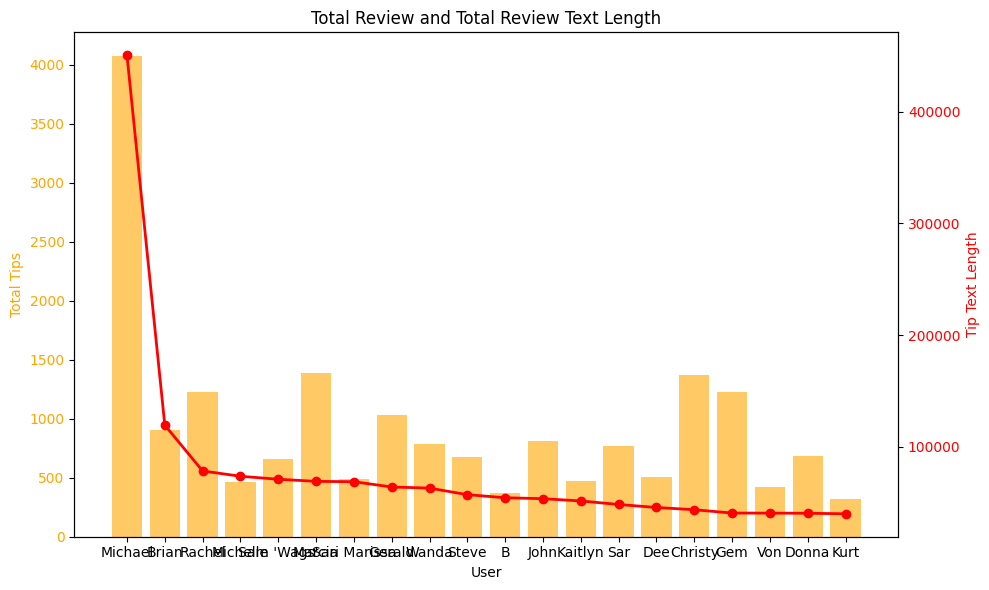

In [20]:
query6_df = query6.toPandas()

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(query6_df['user_name'], query6_df['total_tips'], color='orange', alpha=0.6, label='Total Tips')
ax1.set_xlabel('User')
ax1.set_ylabel('Total Tips', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

ax2 = ax1.twinx()  
ax2.plot(query6_df['user_name'], query6_df['total_tip_text_length'], color='r', marker='o', label='Tip Text Length', linestyle='-', linewidth=2)
ax2.set_ylabel('Tip Text Length', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.xticks(rotation=45)

plt.title('Total Review and Total Review Text Length')
plt.tight_layout()
plt.show()


### Query 7: Analysis of User's Tip Text Length and Review Text Length (Complex Query)

In [21]:
query7 = spark.sql("""
WITH LongestTip AS (
    SELECT 
        u.user_id, 
        u.name AS user_name, 
        SUM(LENGTH(t.text)) AS total_tip_length, 
        RANK() OVER (ORDER BY SUM(LENGTH(t.text)) DESC) AS rank    
    FROM 
        user u
    JOIN 
        tip t ON u.user_id = t.user_id
    GROUP BY 
        u.user_id, user_name
)
SELECT
    r.user_id,
    l.user_name,
    l.total_tip_length,
    SUM(LENGTH(r.text)) AS total_review_length
FROM
    review r
JOIN
    LongestTip l ON r.user_id = l.user_id
WHERE
    l.rank <= 20
GROUP BY 
    r.user_id,l.user_name,l.total_tip_length
ORDER BY
    total_tip_length DESC
LIMIT 20;
""")

query7.show()

24/11/24 21:46:21 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/24 21:46:21 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/24 21:46:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/24 21:46:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/24 21:46:47 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/24 21:46:47 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/24 2

+--------------------+------------+----------------+-------------------+
|             user_id|   user_name|total_tip_length|total_review_length|
+--------------------+------------+----------------+-------------------+
|fCvMnJU1Z-XhAjKg9...|     Michael|          450813|              82118|
|sraTrYU-7q_bQ0TxQ...|       Brian|          119223|            1117658|
|qjfMBIZpQT9DDtw_B...|      Rachel|           78155|            1128843|
|oHjUPJHEOGJsrPqu3...|    Michelle|           73365|             406749|
|kKPbWlBjpSL3Qzvtn...|  Sam 'Wags'|           70715|              49533|
|5Y5KbsI5buMcNh2hT...|      Marcia|           68799|             826404|
|3QnoTcrxuafMCoTzW...|Sari Marissa|           68503|            1326186|
|-G7Zkl1wIWBBmD0KR...|      Gerald|           63767|            2487700|
|zYFGMy1_thjMnvQLX...|       Wanda|           62763|            1487595|
|AaJ9d4OrFmgc4S_U2...|       Steve|           56880|            1974055|
|vRp6jlO9M6wLi150C...|           B|           54137

24/11/24 21:46:59 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/24 21:46:59 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/24 21:47:18 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/24 21:47:18 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/24 21:47:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/24 21:47:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/24 2

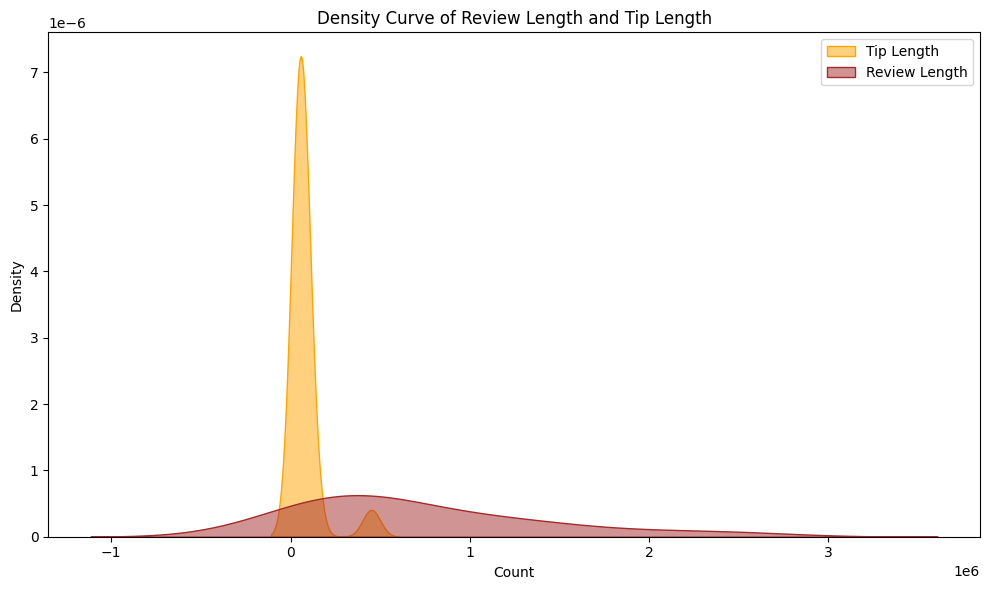

In [22]:

query7_df = query7.toPandas()
plt.figure(figsize=(10, 6))

sns.kdeplot(query7_df['total_tip_length'], label='Tip Length', color='orange', fill=True, alpha=0.5)

sns.kdeplot(query7_df['total_review_length'], label='Review Length', color='brown', fill=True, alpha=0.5)

plt.xlabel('Count')
plt.ylabel('Density')
plt.title('Density Curve of Review Length and Tip Length')

plt.legend()

plt.tight_layout()
plt.show()


### Query 8: Analysis of User's Review Count and Compliment Count (Complex Query)

In [23]:
query8 = spark.sql("""
SELECT 
    u.user_id,
    u.name,
    u.review_count,
    SUM(t.compliment_count) AS total_compliments
FROM 
    user u
JOIN 
    tip t ON u.user_id = t.user_id
GROUP BY 
    u.user_id, u.name, u.review_count
ORDER BY
    total_compliments DESC
LIMIT 20;
""")

query8.show()

+--------------------+------------+------------+-----------------+
|             user_id|        name|review_count|total_compliments|
+--------------------+------------+------------+-----------------+
|fCvMnJU1Z-XhAjKg9...|     Michael|         106|              190|
|sraTrYU-7q_bQ0TxQ...|       Brian|         913|               82|
|A4bsa7ykYRVCnb4h2...|      Angela|         422|               75|
|tsMF0FcFcHZ8i28Wz...|       Susan|         282|               66|
|DwaaafwryFbW7C4E1...|       Donna|        1424|               62|
|lMY8NBPyzlPbbu-KB...|     Christy|        1444|               60|
|-G7Zkl1wIWBBmD0KR...|      Gerald|        3131|               59|
|YsDbMDO7GAfcqZOwi...|       Sofia|         292|               54|
|__QLyY_W06q10ZfBQ...|        Anna|         466|               49|
|AaJ9d4OrFmgc4S_U2...|       Steve|        1580|               48|
|qjfMBIZpQT9DDtw_B...|      Rachel|        2331|               46|
|VL12EhEdT4OWqGq0n...|        Mark|        1646|              

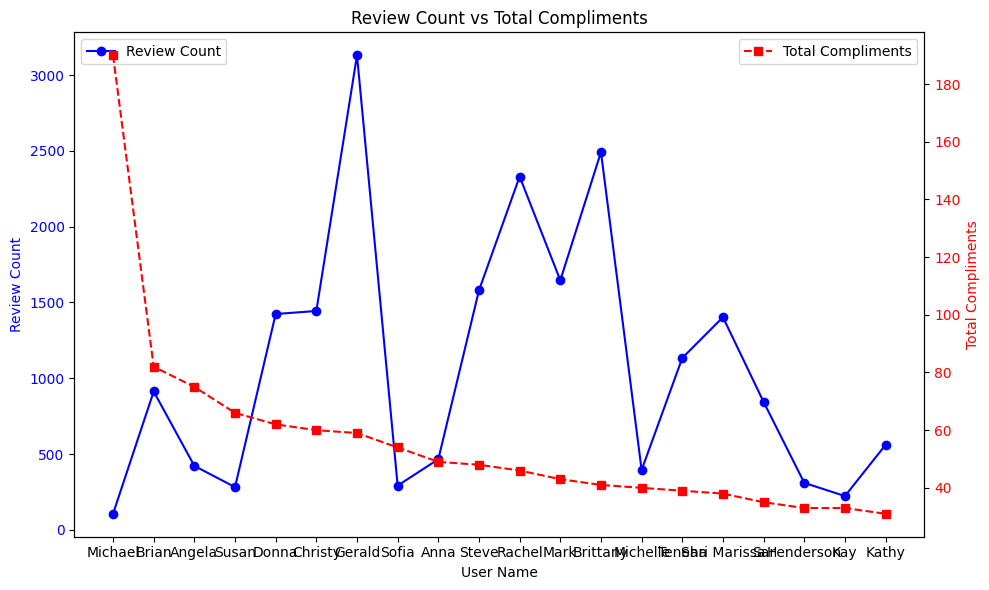

In [24]:
query8_df = query8.toPandas()

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(query8_df['name'], query8_df['review_count'], label='Review Count', color='b', marker='o', linestyle='-')
ax1.set_xlabel('User Name')
ax1.set_ylabel('Review Count', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(query8_df['name'], query8_df['total_compliments'], label='Total Compliments', color='r', marker='s', linestyle='--')
ax2.set_ylabel('Total Compliments', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Review Count vs Total Compliments')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Query 9: Analysis of User's useful reviews and Fans 

In [25]:
query9 = spark.sql("""
SELECT 
    u.user_id,
    u.name,
    u.useful,
    u.fans
FROM 
    user u
ORDER BY 
    fans DESC
LIMIT 20;
""")

query9.show()

+--------------------+--------+------+-----+
|             user_id|    name|useful| fans|
+--------------------+--------+------+-----+
|37cpUoM8hlkSQfReI...|    Mike| 22860|12497|
|hizGc5W1tBHPghM5Y...|   Katie| 48711| 3642|
|Hi10sGSZNxQH3NLyW...|     Fox|206296| 3493|
|JjXuiru1_ONzDkYVr...| Richard|183512| 3243|
|j14WgRoU_-2ZE1aw1...|  Daniel| 43091| 3138|
|VHdY6oG2JPVNjihWh...| Jessica| 47831| 2627|
|iLjMdZi0Tm7DQxX1C...|   Ruggy| 34949| 2547|
|lt7bNHl-TXziny4FE...|   Megan| 22265| 2451|
|fgwI3rYHOv1ipfVfC...|     Emi| 46504| 2424|
|ITa3vh5ERI90G_WP4...|   Peter| 45810| 2388|
|UsXqCXRZwSCSw0AT7...|    Carl| 49385| 2290|
|m07sy7eLtOjVdZ8oN...|      Ed| 73528| 2251|
|CdeyZZ6ZGhvs7YCzV...|    Emma| 19061| 2172|
|nkN_do3fJ9xekchVC...|  Jeremy| 18524| 2107|
|AHRrG3T1gJpHvtpZ-...|Brittany| 18899| 2086|
|3zxy3LVBV3ttxoYbY...|  Farrah| 27350| 2073|
|ysCBsXWPB-LAiewVS...|   Jando| 29785| 2018|
|NfU0zDaTMEQ4-X9db...|    Cara| 14135| 1949|
|peuxbSQwXed-81cSq...|Brittany| 31377| 1927|
|djxnI8Ux8

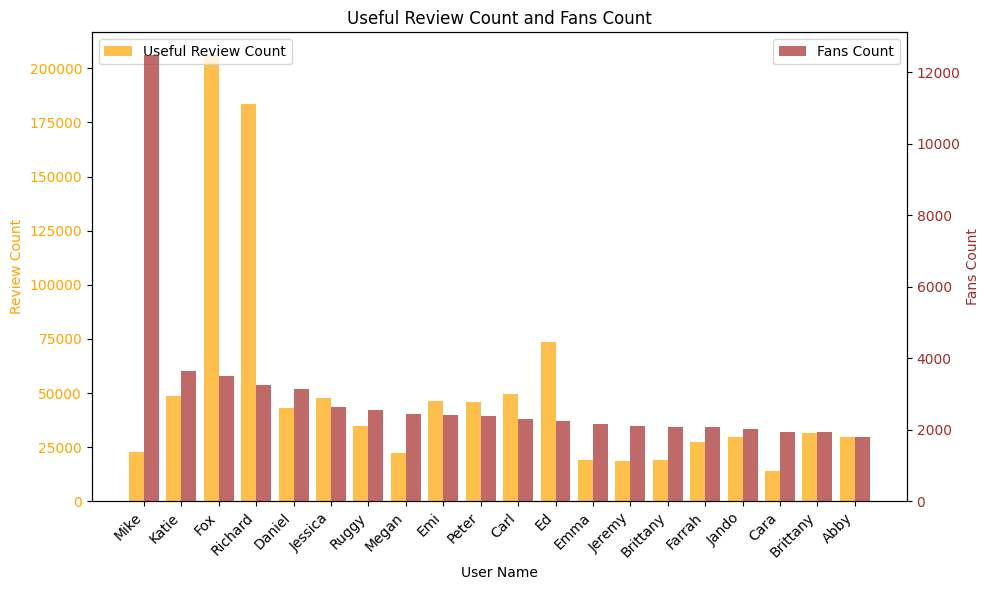

In [26]:
import numpy as np
query9_df = query9.toPandas()

x = np.arange(len(query9_df['name']))  
width = 0.4  
fig, ax1 = plt.subplots(figsize=(10, 6))

bars1 = ax1.bar(x - width/2, query9_df['useful'], width, label='Useful Review Count', color='orange', alpha=0.7)
ax1.set_xlabel('User Name')
ax1.set_ylabel('Review Count', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, query9_df['fans'], width, label='Fans Count', color='brown', alpha=0.7)
ax2.set_ylabel('Fans Count', color='brown')
ax2.tick_params(axis='y', labelcolor='brown')

ax1.set_xticks(x)
ax1.set_xticklabels(query9_df['name'], rotation=45, ha='right')

plt.title('Useful Review Count and Fans Count')
ax1.legend([bars1], ['Useful Review Count'], loc='upper left')
ax2.legend([bars2], ['Fans Count'], loc='upper right')

plt.tight_layout()
plt.show()


### Query 10: User Activity Analysis from Review Count and Yelping Since

In [27]:
query10 = spark.sql("""
SELECT 
    u.user_id,
    u.name,
    u.review_count,
    u.yelping_since,
    (YEAR(CURRENT_DATE) - EXTRACT(YEAR FROM u.yelping_since)) AS years_yelping
FROM 
    user u
ORDER BY 
    review_count DESC
LIMIT 20;

""")

query10.show()

+--------------------+--------+------------+-------------------+-------------+
|             user_id|    name|review_count|      yelping_since|years_yelping|
+--------------------+--------+------------+-------------------+-------------+
|Hi10sGSZNxQH3NLyW...|     Fox|       17473|2009-05-26 11:33:58|           15|
|8k3aO-mPeyhbR5HUu...|  Victor|       16978|2007-12-08 14:56:45|           17|
|hWDybu_KvYLSdEFzG...|   Bruce|       16567|2009-03-08 21:47:44|           15|
|RtGqdDBvvBCjcu5dU...|   Shila|       12868|2010-10-17 06:35:06|           14|
|P5bUL3Engv-2z6kKo...|     Kim|        9941|2006-05-31 21:27:42|           18|
|nmdkHL2JKFx55T3nq...|  Nijole|        8363|2011-11-29 15:50:53|           13|
|bQCHF5rn5lMI9c5kE...| Vincent|        8354|2012-03-18 10:04:51|           12|
|8RcEwGrFIgkt9WQ35...|  George|        7738|2009-11-06 22:53:16|           15|
|Xwnf20FKuikiHcSpc...| Kenneth|        6766|2011-06-10 03:52:07|           13|
|CxDOIDnH8gp9KXzpB...|Jennifer|        6679|2009-11-

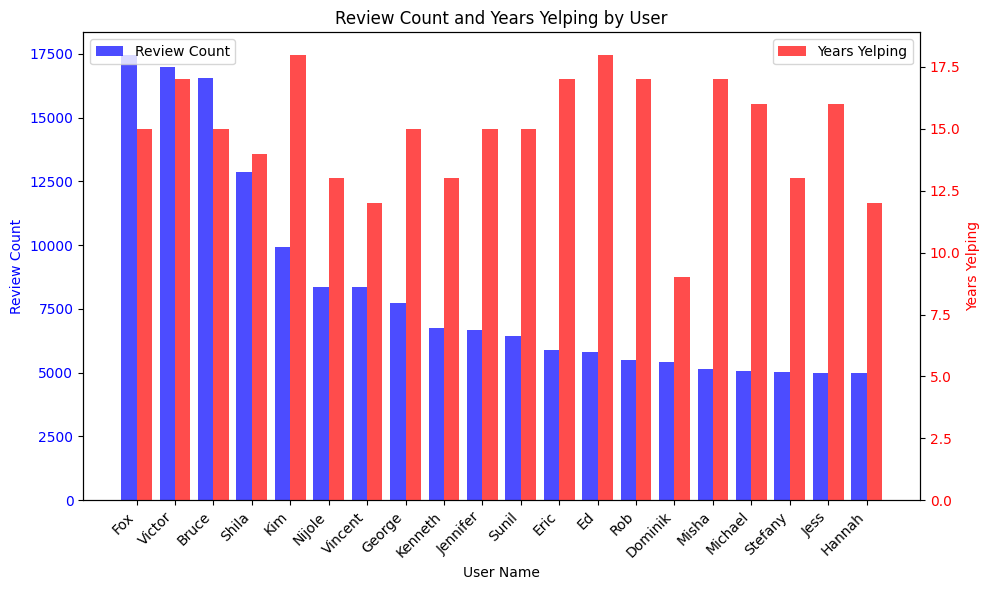

In [28]:
query10_df = query10.toPandas()

x = np.arange(len(query10_df['name'])) 

fig, ax1 = plt.subplots(figsize=(10, 6))

bars1 = ax1.bar(x - width/2, query10_df['review_count'], width, label='Review Count', color='blue', alpha=0.7)
ax1.set_xlabel('User Name')
ax1.set_ylabel('Review Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, query10_df['years_yelping'], width, label='Years Yelping', color='red', alpha=0.7)
ax2.set_ylabel('Years Yelping', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax1.set_xticks(x)
ax1.set_xticklabels(query10_df['name'], rotation=45, ha='right')

plt.title('Review Count and Years Yelping by User')
ax1.legend([bars1], ['Review Count'], loc='upper left')
ax2.legend([bars2], ['Years Yelping'], loc='upper right')

plt.tight_layout()
plt.show()